In [128]:
%matplotlib inline
import sys
sys.path.append('/g/data1a/e14/as3189/OFAM/scripts/')
import string
import math
import calendar
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from main import paths, im_ext, idx_1d, lx, LAT_DEG

# Path to save figures, save data and OFAM model output.
fpath, dpath, xpath, lpath = paths()
# Letters for plot titles.


# plt.rcParams['figure.facecolor'] = 'grey'
files = []
year = [1981, 2012]

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


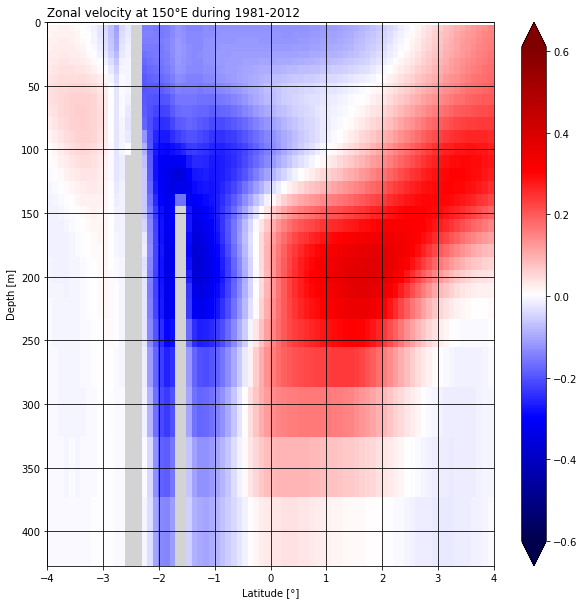

<Figure size 432x288 with 0 Axes>

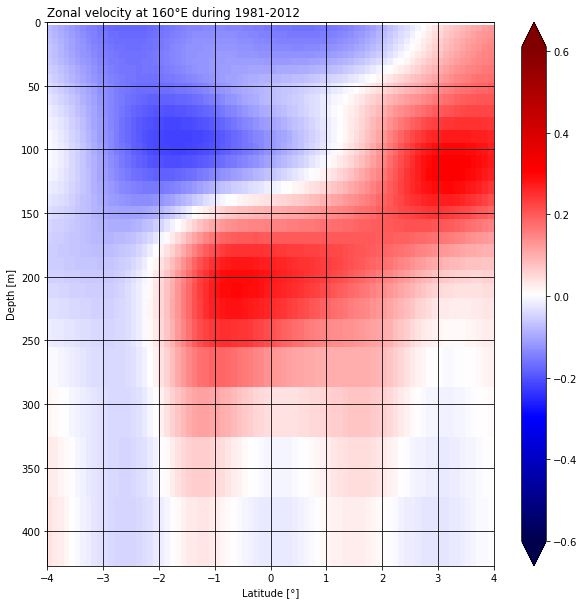

<Figure size 432x288 with 0 Axes>

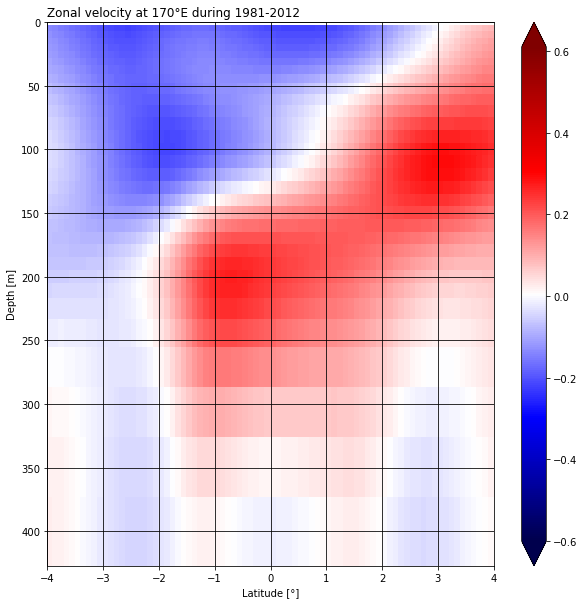

<Figure size 432x288 with 0 Axes>

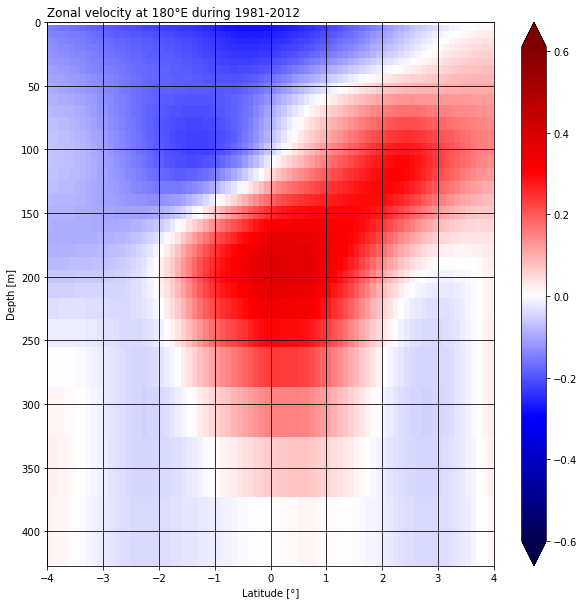

<Figure size 432x288 with 0 Axes>

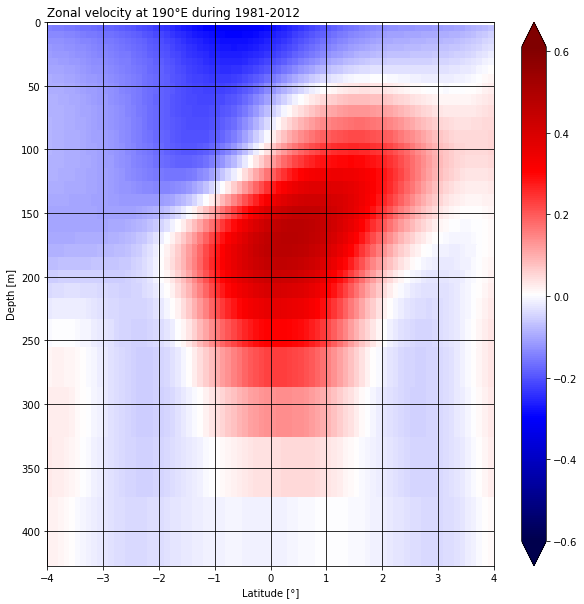

<Figure size 432x288 with 0 Axes>

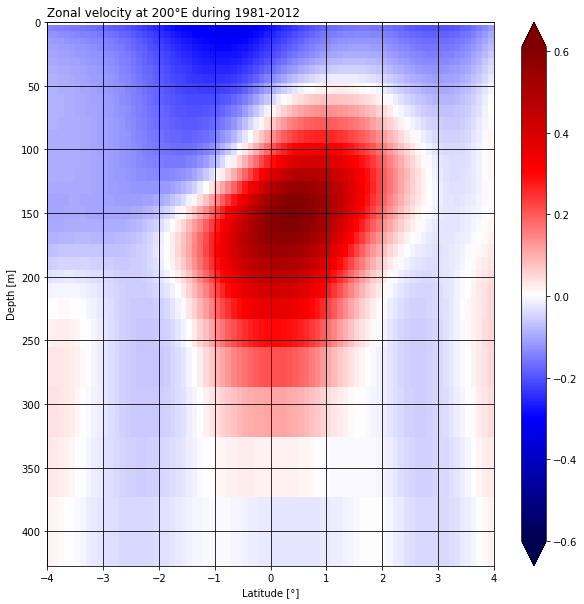

<Figure size 432x288 with 0 Axes>

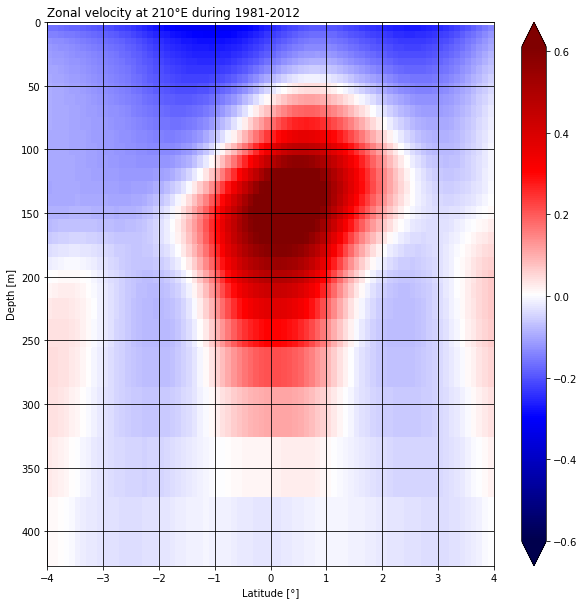

<Figure size 432x288 with 0 Axes>

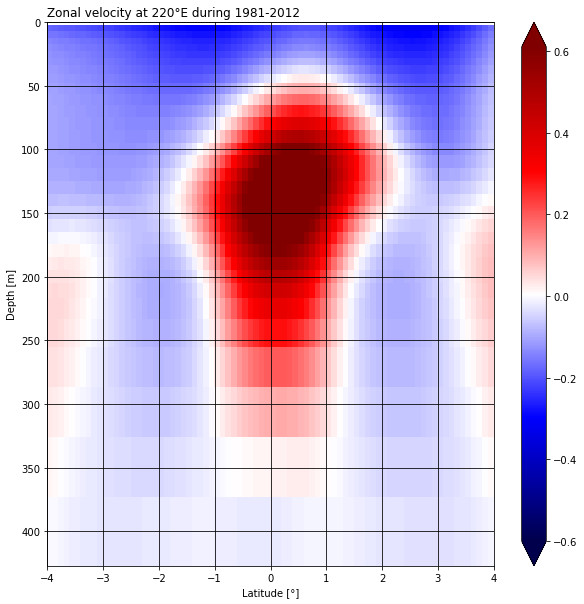

<Figure size 432x288 with 0 Axes>

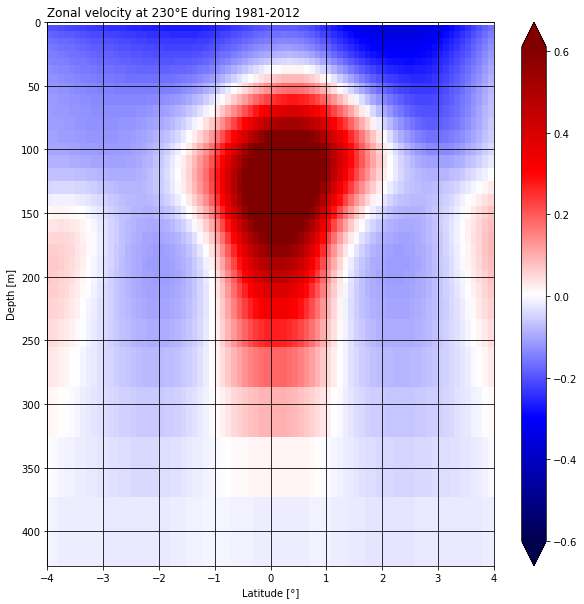

<Figure size 432x288 with 0 Axes>

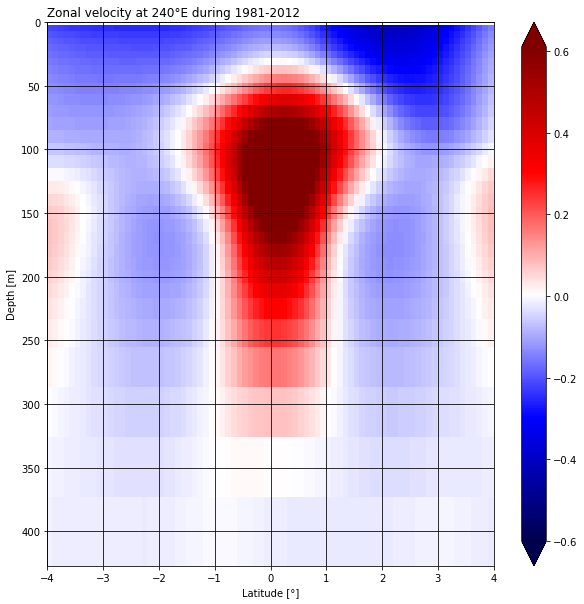

<Figure size 432x288 with 0 Axes>

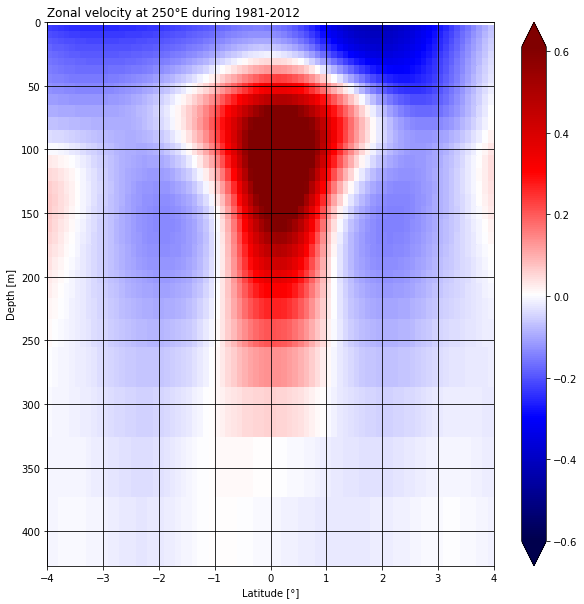

<Figure size 432x288 with 0 Axes>

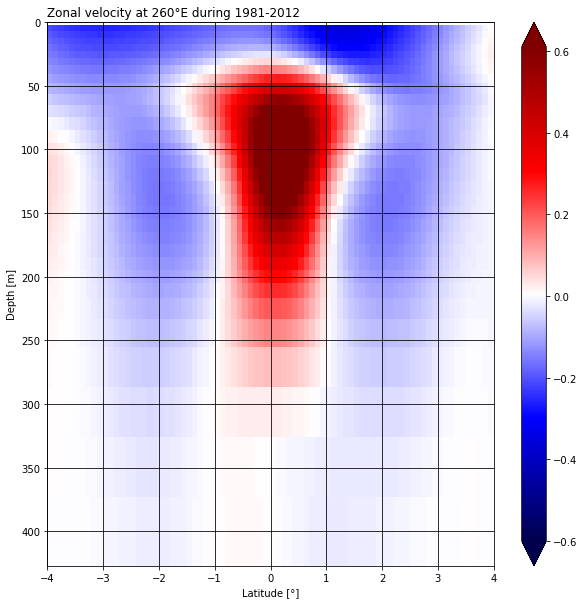

<Figure size 432x288 with 0 Axes>

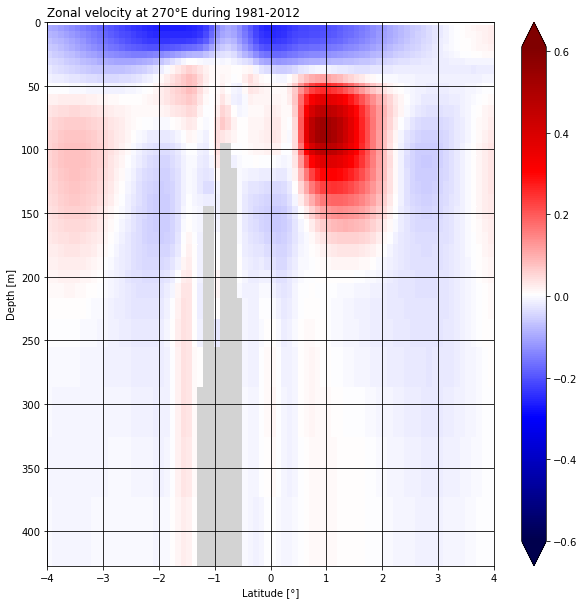

<Figure size 432x288 with 0 Axes>

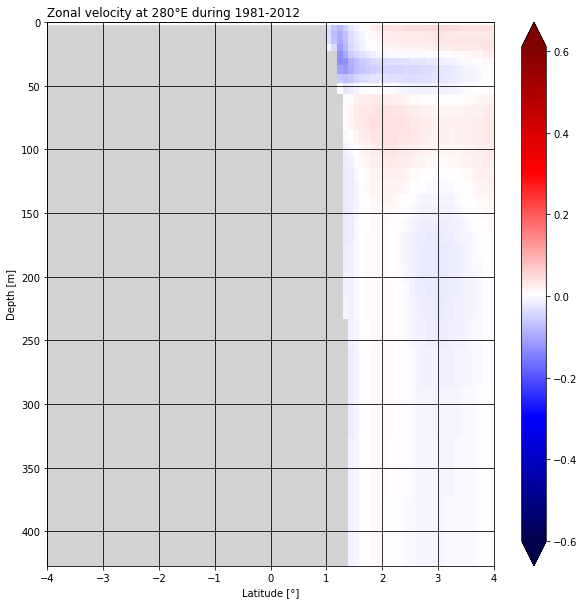

<Figure size 432x288 with 0 Axes>

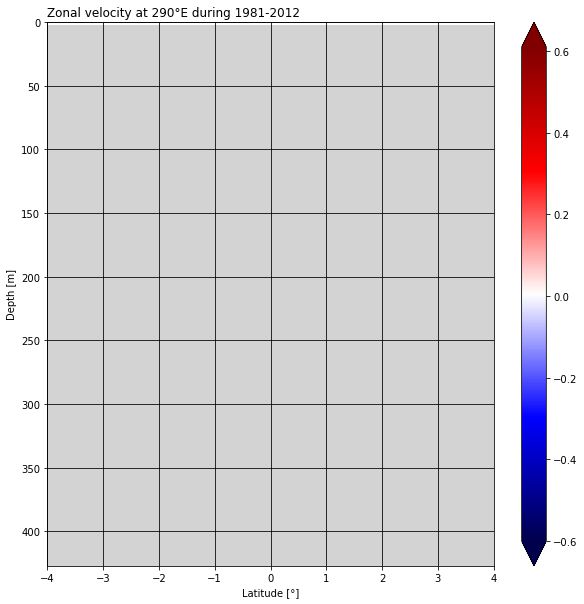

<Figure size 432x288 with 0 Axes>

In [18]:
ds = xr.open_dataset(xpath.joinpath('ocean_u_{}-{}_climo.nc'.format(*lx['years'][0])))
ds = ds.mean('Time')
# The depth level closest to the given depth value.
depth = ds.st_ocean[idx_1d(ds.st_ocean, 450)].item()

du = ds.u.sel(yu_ocean=slice(-4.0, 4.0), st_ocean=slice(2.5, depth))
Y = du.yu_ocean.values
Z = du.st_ocean.values
X = np.arange(150, 300, 10) # Longitudes to plot.
cmap = plt.cm.seismic
cmap.set_bad(color='lightgrey')

for x in X:
    vmax = 0.6
    fig = plt.figure(figsize=(10, 10))
    # ax = fig.add_subplot(1, 1, 1)
    plt.title('Zonal velocity at {}\u00b0E during {}-{}'.format(x, *year), 
              loc='left')
    cs = plt.pcolormesh(Y, Z, du.sel(xu_ocean=x), vmin=-vmax, 
                        vmax=vmax + 0.01, cmap=cmap)
    plt.ylim(depth, 0)
    plt.yticks(np.arange(0, depth, 50))
    plt.ylabel('Depth [m]')
    plt.xlabel('Latitude [\u00b0]')
    fig.colorbar(cs, extend='both')

    plt.grid(axis='both', color='k')
    plt.show()
    plt.savefig(fpath.joinpath('velocity_profile', 
                               'u_profile_{}-{}_{}E{}'.format(*year, x, 
                                          im_ext)))

In [15]:
ds.u.sel(st_ocean=300, xu_ocean=150, method='nearest')

<xarray.DataArray 'u' (yu_ocean: 300)>
array([-3.78938131e-02, -3.60118411e-02, -3.55031937e-02, -3.61135714e-02,
       -3.73343118e-02, -3.88348028e-02, -4.04115915e-02, -4.21155393e-02,
       -4.36160378e-02, -4.48367745e-02, -4.54980098e-02, -4.54471521e-02,
       -4.42009717e-02, -4.17086296e-02, -3.76394950e-02, -3.13832015e-02,
       -2.24056747e-02, -1.05288858e-02,  4.45061596e-03,  2.21004877e-02,
        4.15814705e-02,  6.17491193e-02,  8.16624388e-02,  1.00329600e-01,
        1.17292799e-01,  1.31941691e-01,  1.43411562e-01,  1.51142910e-01,
        1.54677972e-01,  1.54093042e-01,  1.49337247e-01,  1.40690342e-01,
        1.28126875e-01,  1.11901201e-01,  9.23693478e-02,  7.02942982e-02,
        4.65661585e-02,  2.31432021e-02,  1.44962862e-03, -1.64036993e-02,
       -2.32703630e-02, -1.38350567e-02, -3.12814745e-03,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan, -1.

In [2]:
ds = xr.open_dataset('/g/data/e14/as3189/CMIP5/UV_transport/uvo_Omon_ACCESS1-0_historical_climo.nc')

In [3]:
ds.uvo[0,0,39,209]

<xarray.DataArray 'uvo' ()>
array(58934.230469)
Coordinates:
    time     datetime64[ns] 2000-01-31
    lon      float32 ...
    lat      float32 ...
    i        int32 209
    j        int32 39
    lev      float64 5.0
Attributes:
    standard_name:     ocean_volume_x_transport
    long_name:         Ocean Volume X Transport
    units:             m3 s-1
    original_units:    m/sec
    history:           2012-01-18T09:18:12Z altered by CMOR: Converted units ...
    cell_methods:      time: mean
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [4]:
58934.230469/2

29467.1152345

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


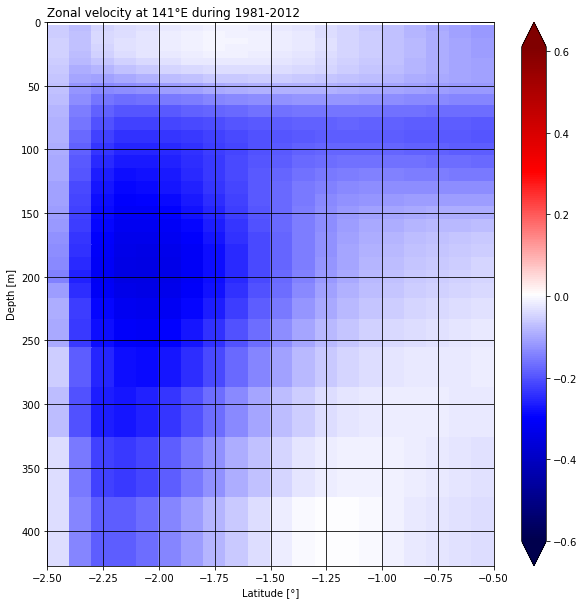

<Figure size 432x288 with 0 Axes>

In [53]:
ds = xr.open_dataset(xpath.joinpath('ocean_u_{}-{}_climo.nc'.format(*lx['years'][0])))
ds = ds.mean('Time')
# The depth level closest to the given depth value.
depth = ds.st_ocean[idx_1d(ds.st_ocean, 450)].item()

du = ds.u.sel(yu_ocean=slice(-2.5, -0.5), st_ocean=slice(2.5, depth))
Y = du.yu_ocean.values
Z = du.st_ocean.values
X = [141]
# Longitudes to plot.
cmap = plt.cm.seismic
cmap.set_bad(color='lightgrey')

for x in X:
    vmax = 0.6
    fig = plt.figure(figsize=(10, 10))
    # ax = fig.add_subplot(1, 1, 1)
    plt.title('Zonal velocity at {}\u00b0E during {}-{}'.format(x, *year), 
              loc='left')
    cs = plt.pcolormesh(Y, Z, du.sel(xu_ocean=x), vmin=-vmax, 
                        vmax=vmax + 0.01, cmap=cmap)
    plt.ylim(depth, 0)
    plt.yticks(np.arange(0, depth, 50))
    plt.ylabel('Depth [m]')
    plt.xlabel('Latitude [\u00b0]')
    fig.colorbar(cs, extend='both')

    plt.grid(axis='both', color='k')
    plt.show()
    plt.savefig(fpath.joinpath('velocity_profile', 
                               'u_profile_{}-{}_{}E{}'.format(*year, x, 
                                          im_1ext)))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


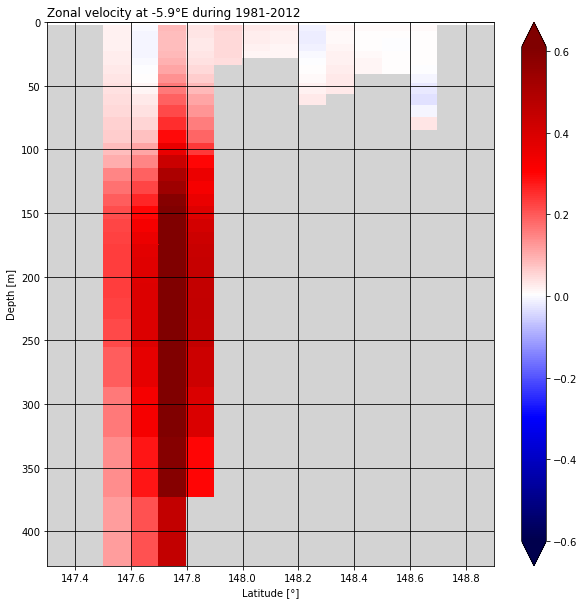

<Figure size 432x288 with 0 Axes>

In [54]:
ds = xr.open_dataset(xpath.joinpath('ocean_v_{}-{}_climo.nc'.format(*lx['years'][0])))
ds = ds.mean('Time')
# The depth level closest to the given depth value.
depth = ds.st_ocean[idx_1d(ds.st_ocean, 450)].item()

du = ds.v.sel(xu_ocean=slice(147.3, 148.9), st_ocean=slice(2.5, depth))
Y = du.xu_ocean.values
Z = du.st_ocean.values
X = [-5.9]
# Longitudes to plot.
cmap = plt.cm.seismic
cmap.set_bad(color='lightgrey')

for x in X:
    vmax = 0.6
    fig = plt.figure(figsize=(10, 10))
    # ax = fig.add_subplot(1, 1, 1)
    plt.title('Zonal velocity at {}\u00b0E during {}-{}'.format(x, *year), 
              loc='left')
    cs = plt.pcolormesh(Y, Z, du.sel(yu_ocean=x, method='nearest'), vmin=-vmax, 
                        vmax=vmax + 0.01, cmap=cmap)
    plt.ylim(depth, 0)
    plt.yticks(np.arange(0, depth, 50))
    plt.ylabel('Depth [m]')
    plt.xlabel('Latitude [\u00b0]')
    fig.colorbar(cs, extend='both')

    plt.grid(axis='both', color='k')
    plt.show()
    plt.savefig(fpath.joinpath('velocity_profile', 
                               'v_profile_{}-{}_{}E{}'.format(*year, x, 
                                          im_ext)))

In [68]:
dr.st_ocean


<xarray.DataArray 'st_ocean' (st_ocean: 31)>
array([  2.5     ,   7.5     ,  12.5     ,  17.51539 ,  22.667021,  28.16938 ,
        34.218006,  40.954975,  48.454975,  56.718006,  65.66938 ,  75.167023,
        85.015388,  95.      , 105.      , 115.      , 125.      , 135.      ,
       145.      , 155.      , 165.      , 175.      , 185.      , 195.      ,
       205.189896, 217.054489, 233.194321, 255.884232, 286.608978, 325.884216,
       373.194336])
Coordinates:
    yu_ocean  float64 -5.9
  * st_ocean  (st_ocean) float64 2.5 7.5 12.5 17.52 ... 255.9 286.6 325.9 373.2
Attributes:
    long_name:       tcell zstar depth
    units:           meters
    positive:        down
    axis:            Z
    cartesian_axis:  Z
    edges:           st_edges_ocean

# New Guniea Coastal Undercurrent

In [87]:
years = lx['years']

# Open historical and future climatologies.
dh = xr.open_dataset(xpath.joinpath('ocean_v_{}-{}_climo.nc'.format(*years[0])))

dr = xr.open_dataset(xpath.joinpath('ocean_v_{}-{}_climo.nc'.format(*years[1])))
depth = dh.st_ocean[idx_1d(dh.st_ocean, 450)].item()

# Slice data to selected latitudes and lonitudes.
dh = dh.sel(xu_ocean=slice(147.4, 148.7), 
            st_ocean=slice(145, 255.884232)).isel(yu_ocean=91).copy()
dr = dr.sel(xu_ocean=slice(147.4, 148.7), 
            st_ocean=slice(145, 255.884232)).isel(yu_ocean=91).copy()
# print(dh)
dz = [(dh.st_ocean[z] - dh.st_ocean[z-1]).item() for z in range(1, len(dh.st_ocean))]
# Cut off last value
dh = dh.isel(st_ocean=slice(0, -1)).copy()
dr = dr.isel(st_ocean=slice(0, -1)).copy()
# print(dh)
for t in range(12):
    for z in range(len(dz)):
        dh['v'][t, z] = dh.v.isel(st_ocean=z, Time=t)*dz[z]*LAT_DEG*math.cos(dh.yu_ocean.item())
        dr['v'][t, z] = dr.v.isel(st_ocean=z, Time=t)*dz[z]*LAT_DEG*math.cos(dh.yu_ocean.item())
dhm = dh#.where(dh['v'] >= 0)
drm = dr#.where(dr['v'] >= 0)
xph = dhm.v.isel(st_ocean=0, xu_ocean=0).copy()
xpr = drm.v.isel(st_ocean=0, xu_ocean=0).copy()
for t in range(12):
    xph[t] = np.nansum(dhm.v[t, :])
    xpr[t] = np.nansum(drm.v[t, :])
# print('Transport', xph[::10]/1e6)
# print('Max', np.max(xph).item()/1e6, xph.yu_ocean[np.argmax(xph)].item(), 
#       xph.sel(xu_ocean=165).item()/1e6, xph.sel(xu_ocean=190).item()/1e6, 
#       xph.sel(xu_ocean=220).item()/1e6)
# print('Min', np.min(xph).item()/1e6, xph.xu_ocean[np.argmin(xph)].item())

In [86]:
print('Hist: {:0.2f}, RCP: {:0.2f} Sv, Diff: {:0.2f}%'
      .format(xph.mean('Time').item()/1e6, 
              xpr.mean('Time').item()/1e6, 
              ((xpr.mean('Time').item()-xph.mean('Time').item())/xph.mean('Time').item())*100))

Hist: 20.29, RCP: 23.67 Sv, Diff: 16.64


# Mindanao Current

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


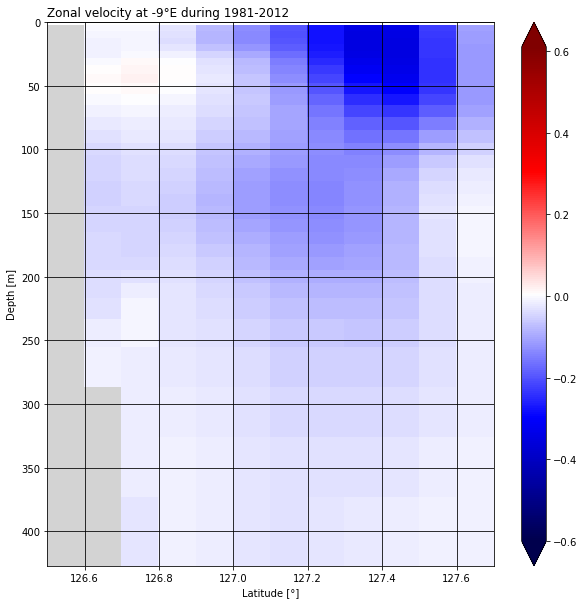

<Figure size 432x288 with 0 Axes>

In [107]:
ds = xr.open_dataset(xpath.joinpath('ocean_v_{}-{}_climo.nc'.format(*lx['years'][0])))
ds = ds.mean('Time')
# The depth level closest to the given depth value.
depth = ds.st_ocean[idx_1d(ds.st_ocean, 450)].item()

du = ds.v.sel(xu_ocean=slice(126.5, 127.8), st_ocean=slice(2.5, depth))
Y = du.xu_ocean.values
Z = du.st_ocean.values
X = [-9]
# Longitudes to plot.
cmap = plt.cm.seismic
cmap.set_bad(color='lightgrey')

for x in X:
    vmax = 0.6
    fig = plt.figure(figsize=(10, 10))
    # ax = fig.add_subplot(1, 1, 1)
    plt.title('Zonal velocity at {}\u00b0E during {}-{}'.format(x, *year), 
              loc='left')
    cs = plt.pcolormesh(Y, Z, du.sel(yu_ocean=x, method='nearest'), vmin=-vmax, 
                        vmax=vmax + 0.01, cmap=cmap)
    plt.ylim(depth, 0)
    plt.yticks(np.arange(0, depth, 50))
    plt.ylabel('Depth [m]')
    plt.xlabel('Latitude [\u00b0]')
    fig.colorbar(cs, extend='both')

    plt.grid(axis='both', color='k')
    plt.show()
    plt.savefig(fpath.joinpath('velocity_profile', 
                               'v_profile_{}-{}_{}E{}'.format(*year, x, 
                                          im_ext)))

In [114]:
dh = xr.open_dataset(xpath.joinpath('ocean_v_{}-{}_climo.nc'.format(*years[0])))
dh.isel(yu_ocean=60)
dh.st_ocean

<xarray.DataArray 'st_ocean' (st_ocean: 51)>
array([   2.5     ,    7.5     ,   12.5     ,   17.51539 ,   22.667021,
         28.16938 ,   34.218006,   40.954975,   48.454975,   56.718006,
         65.66938 ,   75.167023,   85.015388,   95.      ,  105.      ,
        115.      ,  125.      ,  135.      ,  145.      ,  155.      ,
        165.      ,  175.      ,  185.      ,  195.      ,  205.189896,
        217.054489,  233.194321,  255.884232,  286.608978,  325.884216,
        373.194336,  427.054474,  485.189911,  545.511108,  610.415649,
        685.926758,  775.926758,  880.415649,  995.511108, 1115.313354,
       1238.353882, 1368.157471, 1507.733887, 1658.157471, 1818.353882,
       1985.313354, 2165.180176, 2431.101074, 2894.841797, 3603.101074,
       4509.180176])
Coordinates:
  * st_ocean  (st_ocean) float64 2.5 7.5 12.5 ... 2.895e+03 3.603e+03 4.509e+03
Attributes:
    long_name:       tcell zstar depth
    units:           meters
    positive:        down
    axis:       

In [119]:
years = lx['years']

# Open historical and future climatologies.
dh = xr.open_dataset(xpath.joinpath('ocean_v_{}-{}_climo.nc'.format(*years[0])))

dr = xr.open_dataset(xpath.joinpath('ocean_v_{}-{}_climo.nc'.format(*years[1])))
depth = dh.st_ocean[idx_1d(dh.st_ocean, 450)].item()

# Slice data to selected latitudes and lonitudes.
dh = dh.sel(xu_ocean=slice(126.5, 127.6), 
            st_ocean=slice(2.5, 217.054489)).isel(yu_ocean=60).copy()
dr = dr.sel(xu_ocean=slice(126.5, 127.6), 
            st_ocean=slice(2.5, 217.054489)).isel(yu_ocean=60).copy()
# print(dh)
dz = [(dh.st_ocean[z] - dh.st_ocean[z-1]).item() for z in range(1, len(dh.st_ocean))]
# Cut off last value
dh = dh.isel(st_ocean=slice(0, -1)).copy()
dr = dr.isel(st_ocean=slice(0, -1)).copy()
print(dh)
for t in range(12):
    for z in range(len(dz)):
        dh['v'][t, z] = dh.v.isel(st_ocean=z, Time=t)*dz[z]*LAT_DEG*math.cos(dh.yu_ocean.item())
        dr['v'][t, z] = dr.v.isel(st_ocean=z, Time=t)*dz[z]*LAT_DEG*math.cos(dh.yu_ocean.item())
dhm = dh#.where(dh['v'] <= 0)
drm = dr#.where(dr['v'] <= 0)
xph = dhm.v.isel(st_ocean=0, xu_ocean=0).copy()
xpr = drm.v.isel(st_ocean=0, xu_ocean=0).copy()
for t in range(12):
    xph[t] = np.nansum(dhm.v[t, :])
    xpr[t] = np.nansum(drm.v[t, :])
# print('Transport', xph[::10]/1e6)
# print('Max', np.max(xph).item()/1e6, xph.yu_ocean[np.argmax(xph)].item(), 
#       xph.sel(xu_ocean=165).item()/1e6, xph.sel(xu_ocean=190).item()/1e6, 
#       xph.sel(xu_ocean=220).item()/1e6)
# print('Min', np.min(xph).item()/1e6, xph.xu_ocean[np.argmin(xph)].item())

<xarray.Dataset>
Dimensions:     (Time: 12, st_ocean: 24, xu_ocean: 12)
Coordinates:
  * Time        (Time) datetime64[ns] 2012-01-31T12:00:00 ... 2012-12-31T12:00:00
  * xu_ocean    (xu_ocean) float64 126.5 126.6 126.7 126.8 ... 127.4 127.5 127.6
    yu_ocean    float64 -9.0
  * st_ocean    (st_ocean) float64 2.5 7.5 12.5 17.52 ... 175.0 185.0 195.0
Data variables:
    average_DT  (Time) timedelta64[ns] ...
    v           (Time, st_ocean, xu_ocean) float32 ...
Attributes:
    CDI:            Climate Data Interface version 1.9.6 (http://mpimet.mpg.d...
    Conventions:    CF-1.6
    history:        Fri Sep 27 23:50:09 2019: cdo -O -ymonmean,-selyear,1981/...
    filename:       TMP/ocean_ofam_1981_01.nc.0000
    NumFilesInSet:  720
    title:          jra_55_1979
    grid_type:      regular
    NCO:            netCDF Operators version 4.7.7 (Homepage = http://nco.sf....
    CDO:            Climate Data Operators version 1.9.6 (http://mpimet.mpg.d...


In [121]:
print('Hist: {:0.2f}, RCP: {:0.2f} Sv, Diff: {:0.2f}%'
      .format(xph.mean('Time').item()/1e6, 
              (xpr.mean('Time').item()-xph.mean('Time').item())/1e6, 
              ((xpr.mean('Time').item()-xph.mean('Time').item())/xph.mean('Time').item())*100))

Hist: 21.57, RCP: -3.97 Sv, Diff: -18.39%


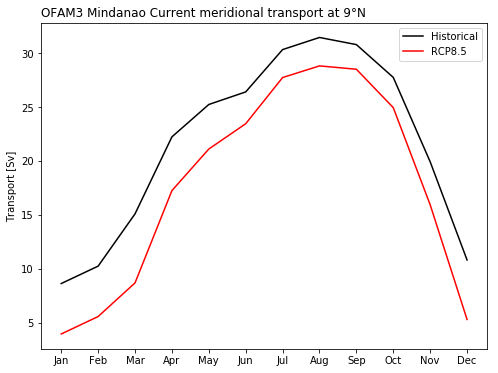

In [146]:
fig = plt.figure(figsize=(8, 6))
plt.plot([i for i in calendar.month_abbr[1:]], xph/1e6, color='k', label='Historical')
plt.plot(np.arange(12), xpr/1e6, color='r', label='RCP8.5')

plt.ylabel('Transport [Sv]')
plt.legend()
plt.title('OFAM3 Mindanao Current meridional transport at 9°N', loc='left')
plt.savefig(fpath.joinpath('MC.png'))